In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/linear

/content/drive/MyDrive/linear


In [ ]:
!pwd

/content/drive/MyDrive/linear


In [ ]:
%cp /content/Linear_test.csv /content/drive/MyDrive/linear
%cp /content/Linear_train.csv /content/drive/MyDrive/linear

cp: cannot stat '/content/Linear_test.csv': No such file or directory
cp: cannot stat '/content/Linear_train.csv': No such file or directory


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/linear/Linear_train.csv')
train = train.loc[0:, :]
train

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,...,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896,311.232491
1,1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,...,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844,6393.112342
2,2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,...,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357,2601.046223
3,3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,...,715.537625,-12.441561,47.883435,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233,13572.118106
4,4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,...,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202,-5462.446898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,38.882059,1829.766795,-9.597762,42.286077,-45.676532,2340.446842,44.758699,-49.232038,4561.096049,...,931.215587,-19.667192,20.825892,18.055764,-40.074521,44.966776,30.681416,38.376682,33.942225,9034.945727
49996,49996,-29.570690,1467.757407,-2.581269,8.699766,-32.209400,2065.685621,13.244693,-27.154067,4922.613361,...,646.439398,45.407497,-41.574684,-41.278010,34.484129,16.631234,-10.488980,-11.637358,-25.774032,-6345.178110
49997,49997,-26.656483,1081.812179,19.742925,-49.109287,-8.179490,1755.112415,-26.730046,-32.187078,4289.779346,...,950.109763,-1.341077,-33.268738,32.604813,-17.198521,-29.136001,24.609231,11.935784,-35.190456,1483.917022
49998,49998,49.470595,1418.823031,14.854524,-6.995360,27.184947,1235.231487,34.556613,-33.790945,4119.297411,...,742.735044,-48.406474,-4.081799,20.777856,-49.422060,-31.251860,-27.546928,38.121308,-10.588040,10720.139180


In [ ]:
train = train.to_numpy()
train = train[:, 1:]

In [ ]:
min = np.amin(train, axis = 0)
max = np.amax(train, axis = 0)

for i in range(20):
  train[:, i] = (train[:,i] - min[i]) / (max[i] - min[i])

In [ ]:
trainX = train[:, 0:20]
trainY = train[:, 20]

In [ ]:
# trainX = train.iloc[:, 1:21]
# trainX = trainX.to_numpy()
print(np.shape(trainX))

(50000, 20)


In [ ]:
def normeq(X, Y):
  inv = np.linalg.inv(np.dot(X.T,X))
  theta = np.dot(np.dot(inv, X.T ), Y )
  pred = np.dot(X, theta)
  return pred

In [ ]:
normeq(X= trainX,Y= trainY)

array([-1102.42326313,  5054.31501069,  5184.59830178, ...,
        3254.28970213, 11599.22657998,  2343.3359438 ])

In [ ]:
x0 = np.ones([np.shape(trainX)[0], 1], dtype = int)
trainXf = np.append(x0, trainX, axis = 1)
print(np.shape(trainXf))

(50000, 21)


In [ ]:
trainY = trainY.reshape(trainY.shape[0], 1)

In [ ]:
def grad(X, Y, learning_rate, noofiter):
  row,column = np.shape(X)
  theta = np.random.randn(column, 1)
  costvalues = []

  for t in range(noofiter):
    y_pred = np.dot(X, theta)
    cost = (1/(2*row))*np.sum(np.square(y_pred - Y))
    costdif = (1/(row))*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*costdif
    costvalues.append(cost)

    if( t % (noofiter/10) == 0):
      print("Cost after", t ,"is :", cost)
  ypred = np.dot(X, theta)

  return ypred, theta, costvalues

In [ ]:
learning_rate = 0.3
noofiter=5000
y_pred, theta ,costvalues = grad(X=trainXf, Y=trainY, learning_rate = learning_rate, noofiter=noofiter)

Cost after 0 is : 13397331.393132182
Cost after 500 is : 23884.894175380123
Cost after 1000 is : 2293.5418996114854
Cost after 1500 is : 1913.8936396208114
Cost after 2000 is : 1907.2181520301394
Cost after 2500 is : 1907.1007746066941
Cost after 3000 is : 1907.0987107185745
Cost after 3500 is : 1907.0986744285103
Cost after 4000 is : 1907.0986737904088
Cost after 4500 is : 1907.0986737791895


In [ ]:
theta.shape

(21, 1)

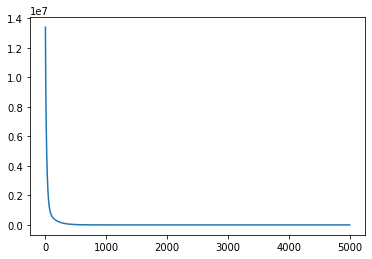

In [ ]:
mpl.plot(np.arange(0, noofiter), costvalues)
mpl.show()

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/linear/Linear_test.csv')
test.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,40.790740,1187.897579,-28.941991,43.498302,14.157983,2536.000797,-34.181638,-14.940211,4746.739893,...,707.727094,21.030812,-44.606156,-9.625546,42.276162,-11.000471,-19.830564,-5.529430,-28.154864,-163.522723
1,1,47.968749,1498.588679,24.922821,-38.979082,16.405452,1798.950305,-23.660484,-34.792328,4076.982013,...,737.135391,-17.860346,42.274026,-19.886483,16.337922,9.025313,27.760845,21.484409,-24.206545,6484.664510
2,2,9.762564,1316.354415,1.170771,10.365178,-11.993156,2714.382200,26.382837,27.442924,4178.719984,...,940.732329,-35.879432,23.837924,3.729191,33.564390,12.848880,-45.837834,-49.592176,36.688611,2393.818082
3,3,6.414629,1895.586749,44.496934,-49.677800,-24.825833,2327.316373,1.406644,44.103008,4586.697737,...,925.441952,-19.409771,25.346975,-7.729920,-42.813516,-17.666168,35.506064,-49.048652,-34.048583,-9397.072355
4,4,-4.112012,1130.920162,19.103960,-8.741503,-28.589701,1299.418975,42.946135,4.758032,4809.536369,...,797.953813,-46.788081,43.876292,34.009303,34.061089,-30.182903,-41.188733,26.828040,-22.476663,10487.323575


In [ ]:
test = test.iloc[: , 1:22]
test = test.to_numpy()
for i in range(20):
  test[:, i] = (test[:,i] - min[i]) / (max[i] - min[i])

In [ ]:
testX = test[:, 0:20]
testY = test[:, 20]

In [ ]:
x0 = np.ones([np.shape(testX)[0], 1], dtype = int)
testX = np.append(x0, testX, axis = 1)

In [ ]:
y_predtrain = np.dot(testX, theta)

In [ ]:
rmserror = np.sqrt(np.sum(np.square(y_predtrain - testY))/(testX.shape[0]))
rmserror

1.8286878287640866